In [1]:
import numpy as np
import json
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
with open('brew.json') as f:
  data = np.array(json.load(f))

In [3]:
#data = data[:data.size>>1]

In [4]:
data

array([210.58431408, 202.40094325, 205.8724279 , 213.4453592 ,
       211.20534794, 194.13633272, 205.70053051, 199.09185675,
       199.38068689, 202.46359101, 200.86426143, 208.72564104,
       204.56622635, 200.7300501 , 202.6631794 , 202.00204596,
       208.96447444, 198.76905042, 201.87840621, 194.87542556,
       184.6820611 , 203.92171157, 205.18661719, 195.54700988,
       213.61852774, 191.27380595, 200.2745511 , 198.8768969 ,
       209.19667529, 208.81615262, 200.92968455, 202.26897512,
       194.67328551, 188.11522119, 197.9125271 , 200.93809381,
       207.38174408, 207.21427909, 197.6760391 , 198.1861835 ,
       193.70868221, 191.47989238, 189.76237886, 211.70465237,
       196.94208691, 197.37155419, 192.48322784, 204.66494213,
       190.31661291, 198.72355832, 194.62720063, 202.32141499,
       196.93516917, 192.9162069 , 199.83090663, 202.56999122,
       200.39910333, 201.81483139, 196.19406744, 197.823553  ,
       195.96523731, 197.84268103, 195.12112231, 189.64

In [5]:
data.shape

(100,)

In [6]:
mean = np.mean(data)
mean

200.35884809320694

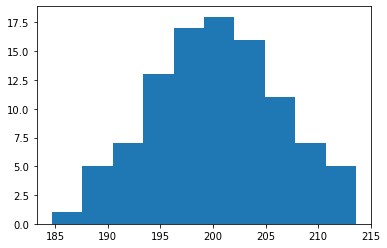

In [7]:

plt.hist(data);

In [8]:
import scipy.stats

In [9]:
std_dev = np.std(data)
std_dev

6.047293468299477

In [10]:
N = data.size
S_n = std_dev / np.sqrt(N)
S_n

0.6047293468299477

In [11]:
confidence = 0.99
df = N - 1
t = scipy.stats.t.ppf(confidence, df)
t

2.3646058614359737

In [12]:
mean + np.array([-1, 1]) * t * S_n

array([198.92890154, 201.78879465])

In [13]:
confidences = np.linspace(85, 99.99, 100) / 100
lower_bounds = np.zeros_like(confidences)
upper_bounds = np.zeros_like(confidences)
for i, conf in enumerate(confidences):
  ti = scipy.stats.t.ppf(conf, df)
  lower_bounds[i] = mean - ti * S_n
  upper_bounds[i] = mean + ti * S_n

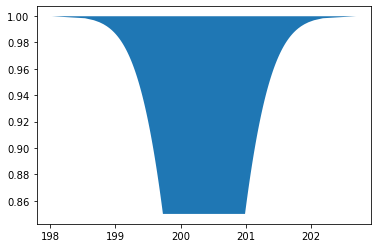

In [14]:
plt.fill_betweenx(confidences, lower_bounds, upper_bounds)

In [15]:
mean + np.array([-1, 1]) * scipy.stats.norm.ppf(confidence) * S_n

array([198.95203726, 201.76565892])